In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score,classification_report

warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
df = pd.read_csv('Heart_diseases.csv')

By looking at the data we can say it is a classfication data set . HeartDisease is a traget column

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [5]:
df.shape

(918, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


There are 918 rows and 12 columns 
Their are no null values in any of the columns

In [7]:
#geting the columns name
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [8]:
#renaming the HeartDisease cloumn name
df.rename({'HeartDisease':'Target'},axis=1,inplace=True)
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'Target'],
      dtype='object')

In [9]:
print(df['RestingECG'].unique())
print(df['ExerciseAngina'].unique())
print(df['ChestPainType'].unique())


['Normal' 'ST' 'LVH']
['N' 'Y']
['ATA' 'NAP' 'ASY' 'TA']


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
Target,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [11]:
df.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [12]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [13]:
#There are 4 categorical columns .converting it in to numarical data by using label encoding code 
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()
df['Sex']=encoder.fit_transform(df['Sex'])
df['ChestPainType']=encoder.fit_transform(df['ChestPainType'])
df['RestingECG']=encoder.fit_transform(df['RestingECG'])
df['ExerciseAngina']=encoder.fit_transform(df['ExerciseAngina'])
df['ExerciseAngina']=encoder.fit_transform(df['ExerciseAngina'])
df['ST_Slope']=encoder.fit_transform(df['ST_Slope'])

df.head()



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
Sex,918.0,0.789760,0.407701,0.0,1.00,1.0,1.0,1.0
ChestPainType,918.0,0.781046,0.956519,0.0,0.00,0.0,2.0,3.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
RestingECG,918.0,0.989107,0.631671,0.0,1.00,1.0,1.0,2.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
ExerciseAngina,918.0,0.404139,0.490992,0.0,0.00,0.0,1.0,1.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


In [15]:
df.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


<AxesSubplot:>

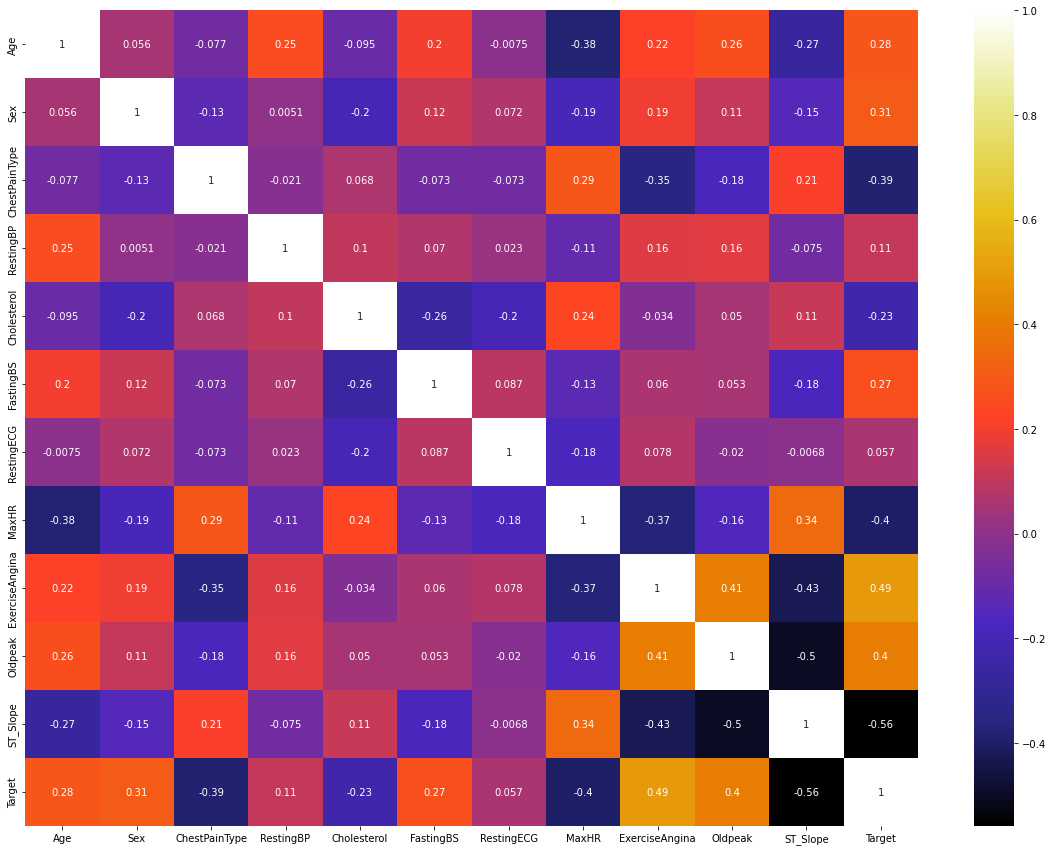

In [16]:
#We can remove the columns if there or any columns which is highly related to the Traget columns. But in this case all the columns or different for one and other
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap='CMRmap',annot=True)

In [17]:
df.info()
#all columns are numaric.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  Target          918 non-null    int64  
dtypes: float64(1), int32(4), int64(7)
memory usage: 71.8 KB


In [18]:
df.isnull().sum()
#there or no null values.

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
Target            0
dtype: int64

In [19]:
df.describe().T
#We can find there or some outliers in cholesterol , oldpeak

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
Sex,918.0,0.789760,0.407701,0.0,1.00,1.0,1.0,1.0
ChestPainType,918.0,0.781046,0.956519,0.0,0.00,0.0,2.0,3.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
RestingECG,918.0,0.989107,0.631671,0.0,1.00,1.0,1.0,2.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
ExerciseAngina,918.0,0.404139,0.490992,0.0,0.00,0.0,1.0,1.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


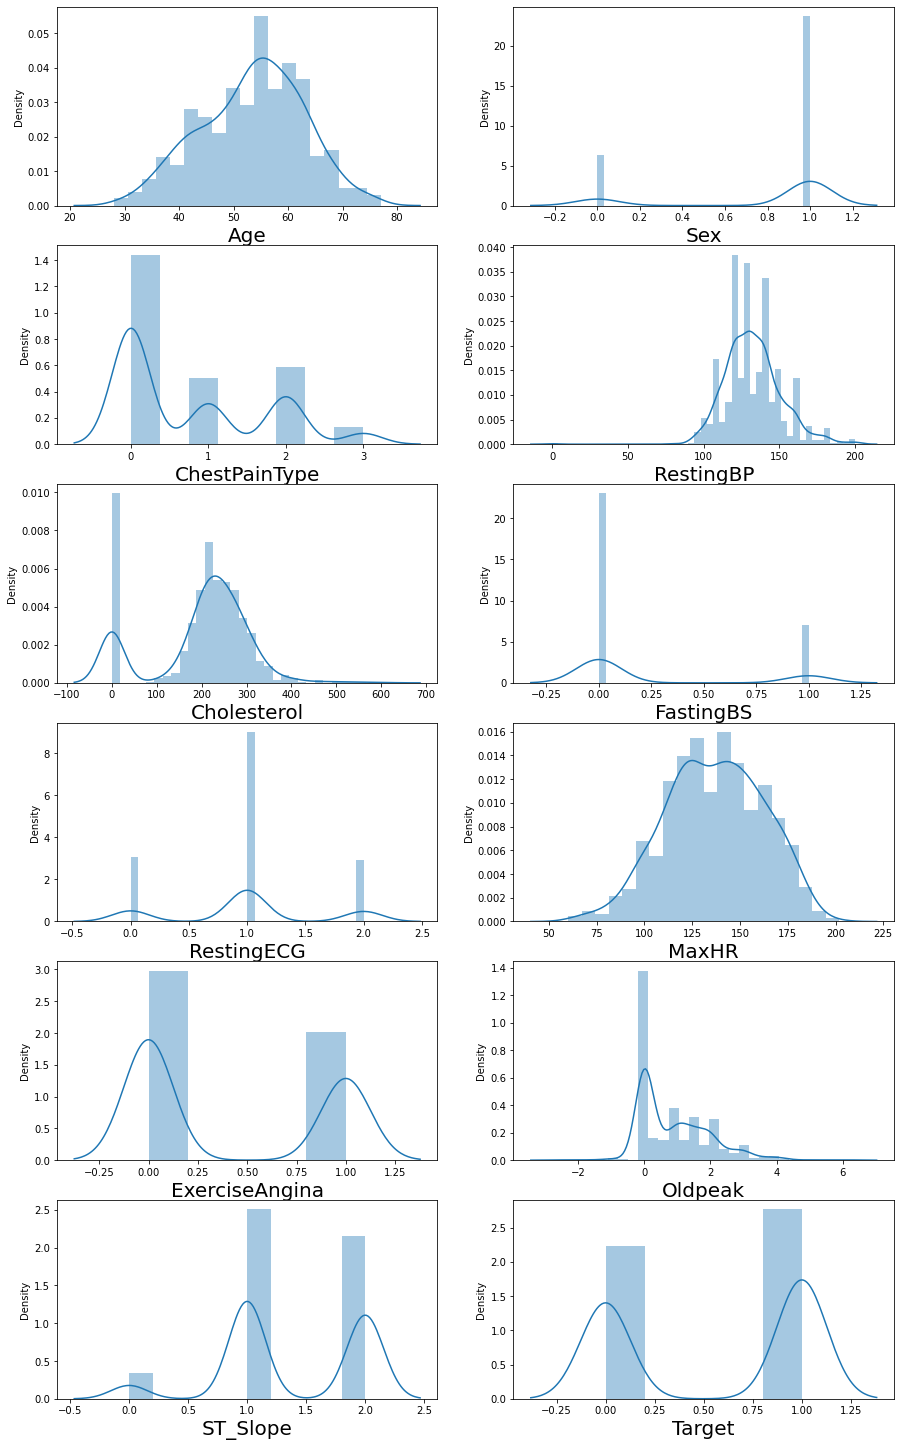

In [20]:
### Checking the distribution of the features

plt.figure(figsize=(15,30),facecolor='white')
pltnumber = 1

for column in df:
    if pltnumber<=12:      ## Since there are 14 columns
        a = plt.subplot(7,2,pltnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    pltnumber+=1
plt.show()

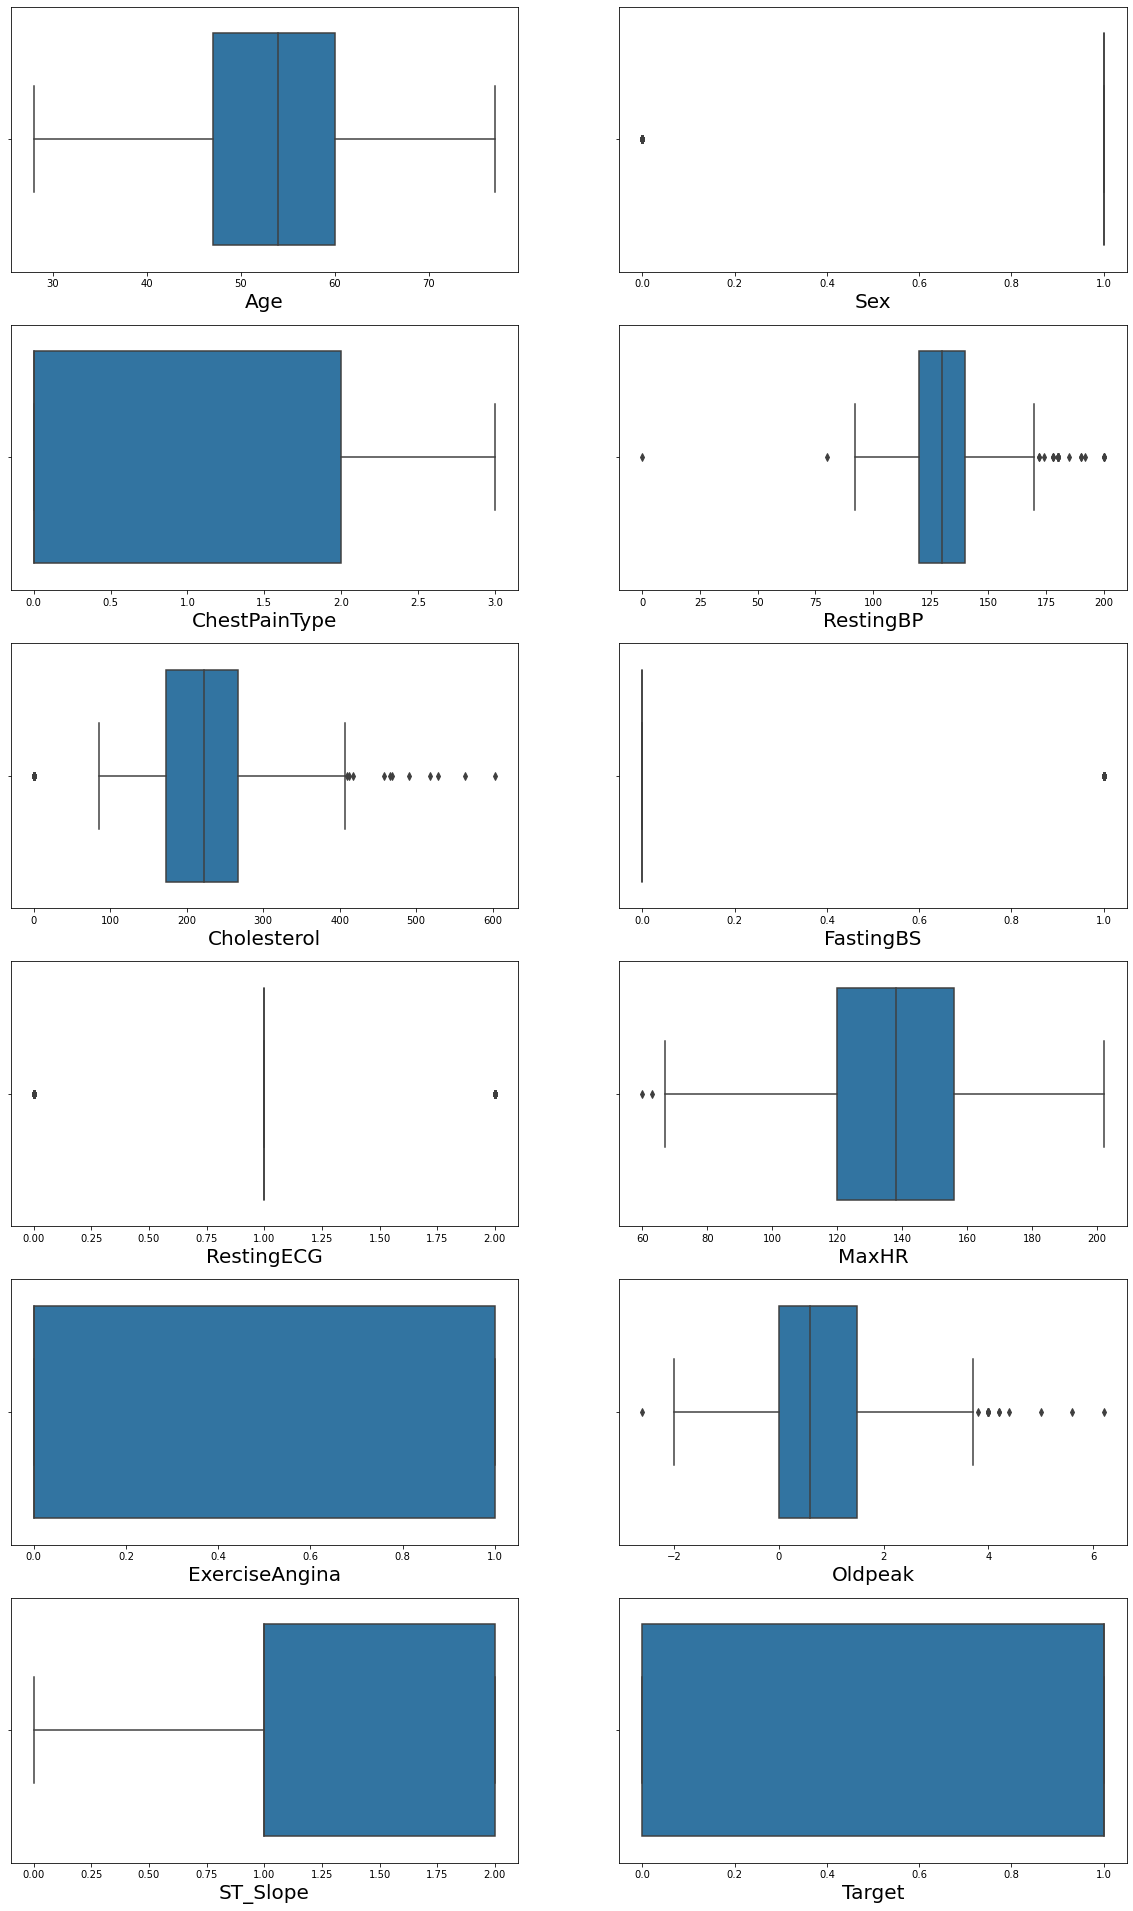

In [21]:
plt.figure(figsize=(20,40))
pltnumber = 1

for column in df:
    ax = plt.subplot(7,2,pltnumber)
    sns.boxplot(df[column])
    plt.xlabel(column,fontsize=20)
        
    pltnumber+=1
plt.show()

By looking at the df.describe and Ploting we can see there are some outliers. 

There or outliers in Oldpeak , Cholesterol , RestingBP


Methods of indenfying the outliers or 

Z score.

IQR

Compare SKewness

Z score consume sell time lets go with the Z Score 
Z Score formula is 

z_scores = (df - np.mean(data)) / np.std(df)

In [22]:
# Function to detect outliers
def find_outliers_z_score(df, variable):
    quartile1 = df[variable].quantile(0.10)
    quartile3 = df[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [23]:
for i in df.columns:
    print(f"The lower and upper limit of {i} is {find_outliers_z_score(df,i)}")

The lower and upper limit of Age is (2.5, 102.5)
The lower and upper limit of Sex is (-1.5, 2.5)
The lower and upper limit of ChestPainType is (-3.0, 5.0)
The lower and upper limit of RestingBP is (35.0, 235.0)
The lower and upper limit of Cholesterol is (-457.5, 762.5)
The lower and upper limit of FastingBS is (-1.5, 2.5)
The lower and upper limit of RestingECG is (-3.0, 5.0)
The lower and upper limit of MaxHR is (2.5, 270.5)
The lower and upper limit of ExerciseAngina is (-1.5, 2.5)
The lower and upper limit of Oldpeak is (-3.4499999999999997, 5.75)
The lower and upper limit of ST_Slope is (-0.5, 3.5)
The lower and upper limit of Target is (-1.5, 2.5)


In [42]:
df1 = df.copy()
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[df1[col] > upper_limit]

In [43]:
remove_outliers_IQR("RestingBP")

percentile25 120.0
percentile75 140.0
Upper limit 170.0
Lower limit 90.0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target


In [29]:
remove_outliers_IQR("Cholesterol")

percentile25 173.25
percentile75 267.0
Upper limit 407.625
Lower limit 32.625


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target


In [30]:
remove_outliers_IQR("MaxHR")

percentile25 120.0
percentile75 156.0
Upper limit 210.0
Lower limit 66.0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target


In [31]:
remove_outliers_IQR("Oldpeak")

percentile25 0.0
percentile75 1.5
Upper limit 3.75
Lower limit -2.25


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target


In [33]:
def create_comparison_plot(df,df1,column):
    # Comparing
    plt.figure(figsize=(15,7))
    plt.subplot(2,2,1)
    sns.distplot(df[column])

    plt.subplot(2,2,2)
    sns.boxplot(df[column])

    plt.subplot(2,2,3)
    sns.distplot(df1[column])

    plt.subplot(2,2,4)
    sns.boxplot(df1[column])

    plt.show()

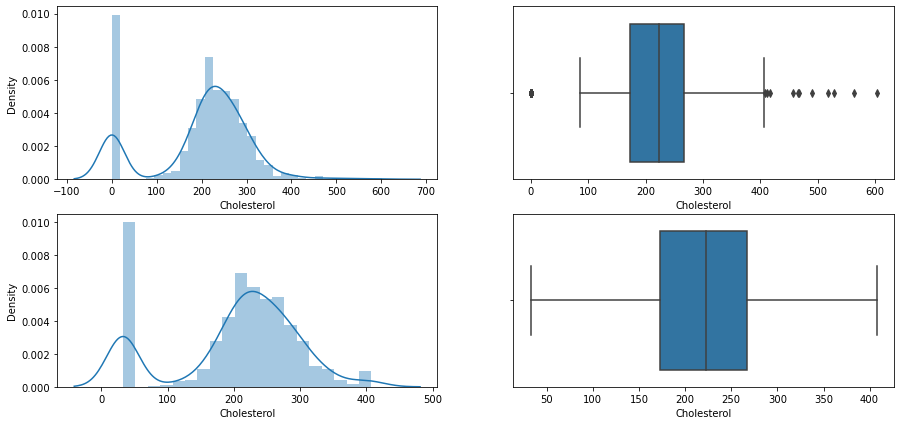

In [34]:
create_comparison_plot(df,df1,'Cholesterol')

In [35]:
df.skew()

Age              -0.195933
Sex              -1.424540
ChestPainType     0.793916
RestingBP         0.179839
Cholesterol      -0.610086
FastingBS         1.264484
RestingECG        0.008492
MaxHR            -0.144359
ExerciseAngina    0.391329
Oldpeak           1.022872
ST_Slope         -0.381382
Target           -0.215086
dtype: float64

In [36]:
df1.skew()

Age              -0.195933
Sex              -1.424540
ChestPainType     0.793916
RestingBP         0.268093
Cholesterol      -0.610829
FastingBS         1.264484
RestingECG        0.008492
MaxHR            -0.136355
ExerciseAngina    0.391329
Oldpeak           0.816956
ST_Slope         -0.381382
Target           -0.215086
dtype: float64

In [44]:
df = df1

In [50]:
X = df.drop(columns = 'Target')

In [51]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140.0,289,0,1,172,0,0.0,2
1,49,0,2,160.0,180,0,1,156,0,1.0,1
2,37,1,1,130.0,283,0,2,98,0,0.0,2
3,48,0,0,138.0,214,0,1,108,1,1.5,1
4,54,1,2,150.0,195,0,1,122,0,0.0,2


In [52]:
y = df['Target']

In [53]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: Target, dtype: int64

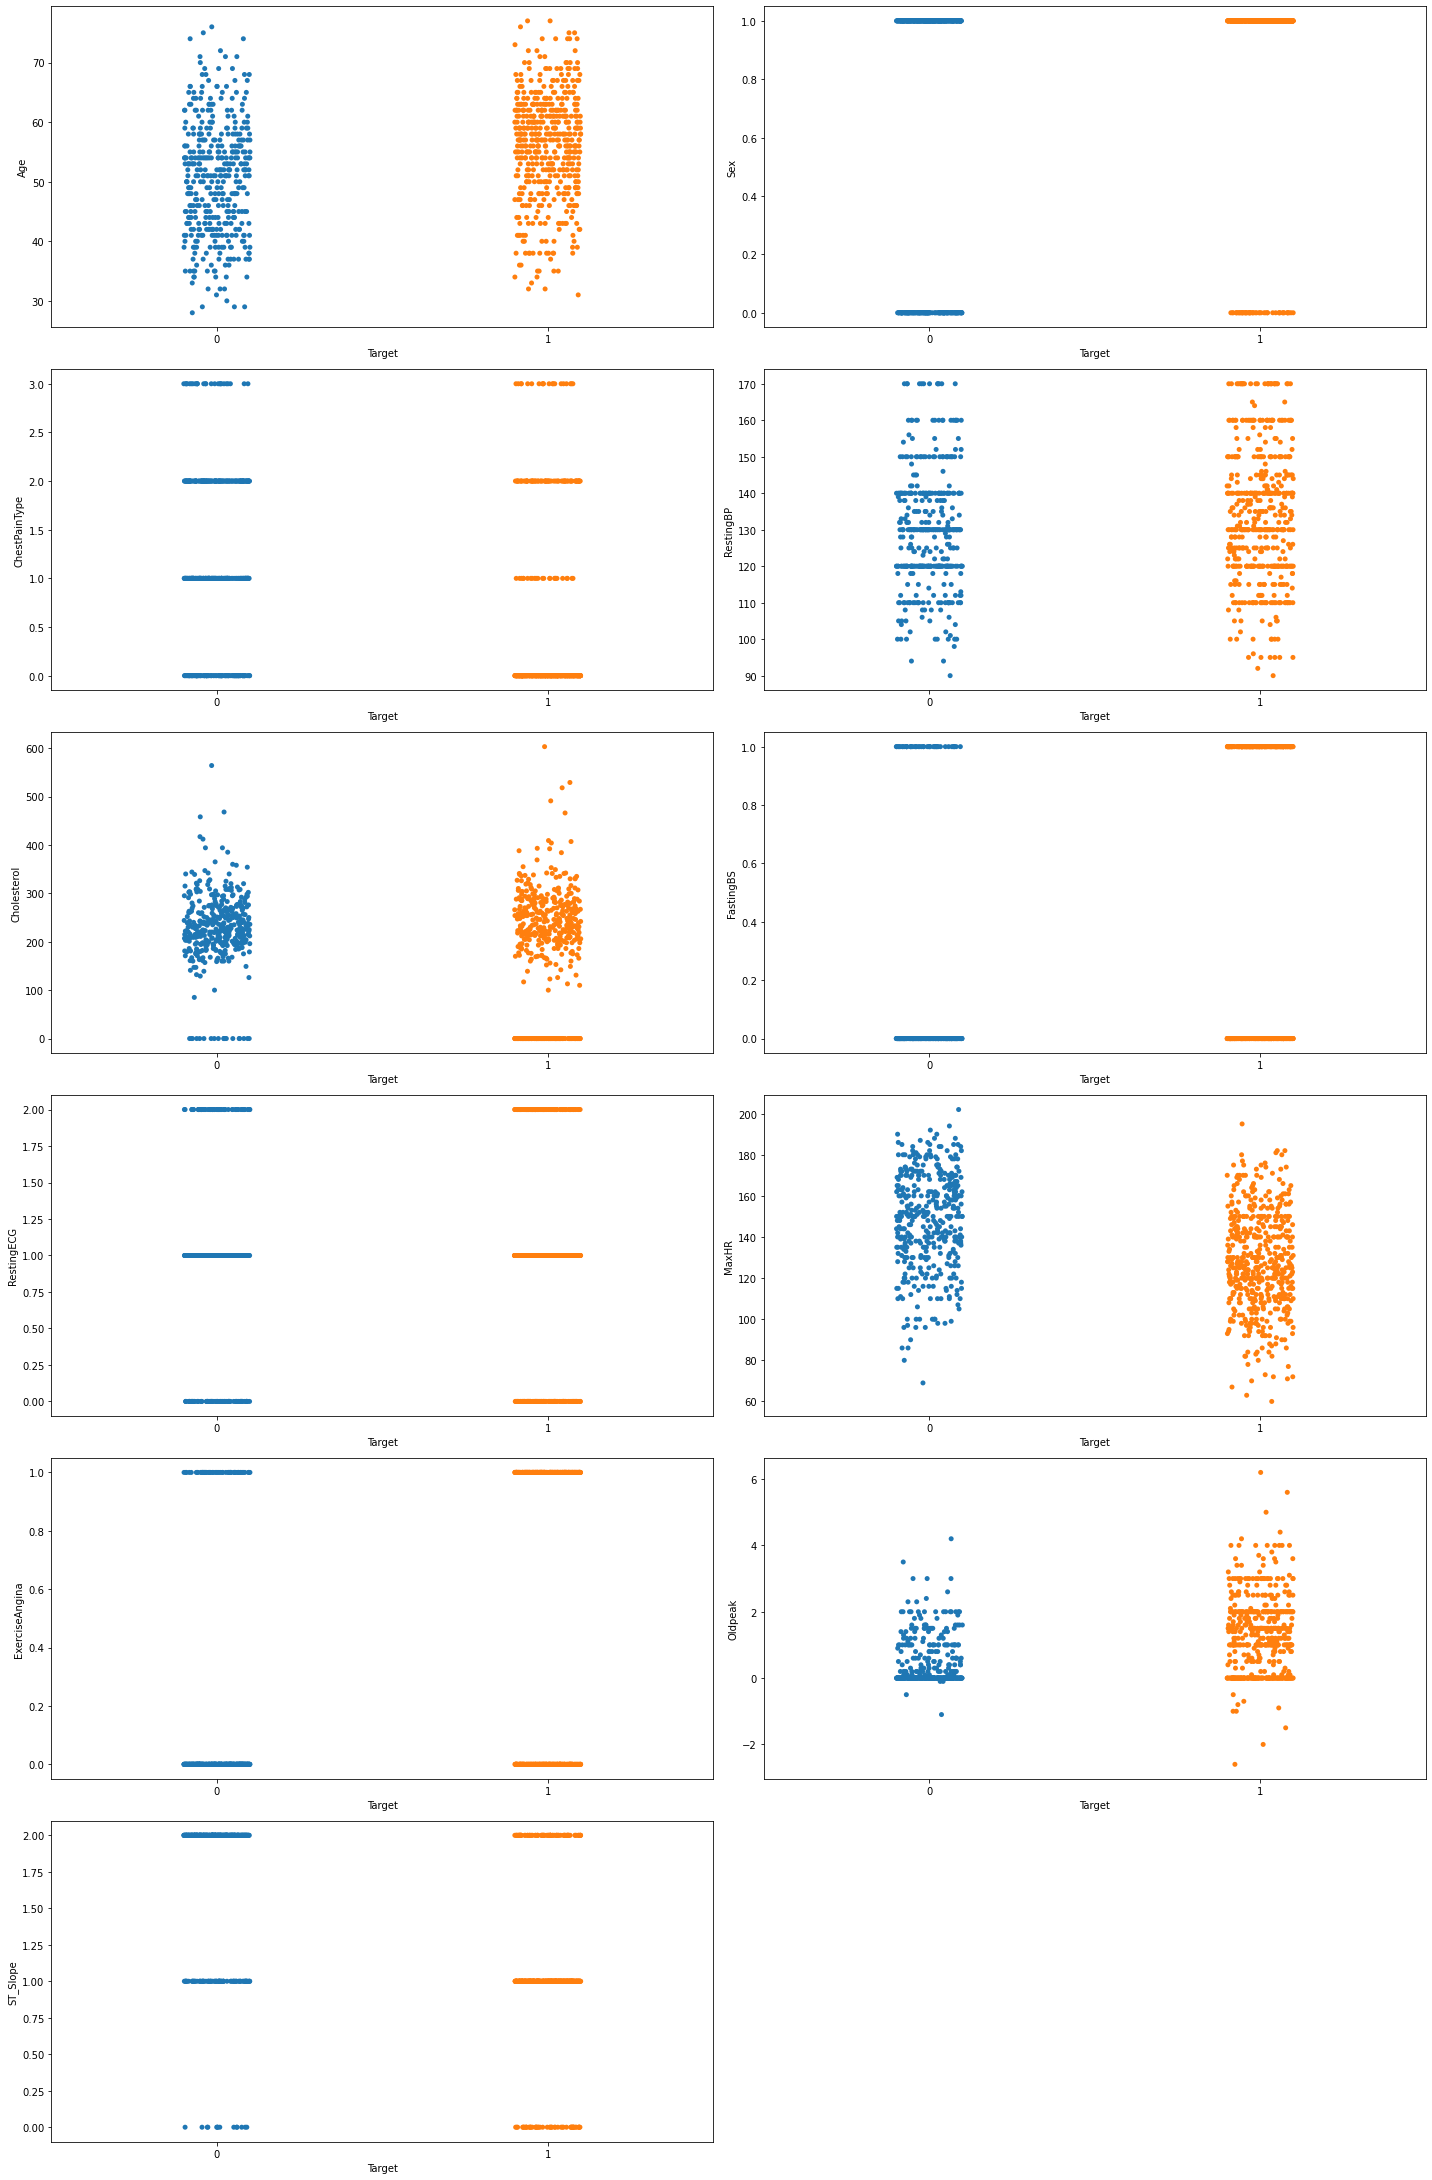

In [59]:
plt.figure(figsize = (20,35))
plotnum = 1

for i in X:
    if plotnum<=11:
        a=plt.subplot(7,2,plotnum)
        sns.stripplot(y,X[i])
    plotnum+=1
plt.tight_layout()

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

In [63]:
X_train.shape

(642, 11)

In [64]:
y_train.shape

(642,)

In [65]:
X_test.shape , y_test.shape

((276, 11), (276,))

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [69]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-1.79842965,  0.51359471,  1.34784913, ..., -0.84380092,
        -0.82756593,  1.04372136],
       [ 1.32674892,  0.51359471, -0.80201209, ...,  1.18511366,
        -0.73122915,  1.04372136],
       [ 0.24910114,  0.51359471, -0.80201209, ..., -0.84380092,
        -0.82756593,  1.04372136],
       ...,
       [ 1.65004326, -1.94706055,  2.42277974, ..., -0.84380092,
         0.90649606,  1.04372136],
       [ 1.32674892,  0.51359471,  1.34784913, ..., -0.84380092,
        -1.30924981,  1.04372136],
       [ 0.03357158,  0.51359471, -0.80201209, ..., -0.84380092,
         0.3284754 ,  1.04372136]])

In [70]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.14133636,  0.51359471, -0.80201209, ...,  1.18511366,
         4.56729359, -2.30662421],
       [ 0.24910114,  0.51359471, -0.80201209, ...,  1.18511366,
         1.09916962, -0.63145143],
       [-0.82854664,  0.51359471, -0.80201209, ..., -0.84380092,
        -0.82756593, -0.63145143],
       ...,
       [ 0.68016025,  0.51359471, -0.80201209, ...,  1.18511366,
         1.86986383, -0.63145143],
       [-2.33725354,  0.51359471,  0.27291852, ..., -0.84380092,
        -0.82756593,  1.04372136],
       [ 2.18886715,  0.51359471,  1.34784913, ..., -0.84380092,
        -0.63489237,  1.04372136]])

In [72]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [75]:
classifier.fit(X_train,y_train)

LogisticRegression()

In [77]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [78]:
score = accuracy_score(y_pred,y_test)

In [79]:
score

0.8442028985507246

In [82]:
from sklearn.svm import SVC
classifier_svc = SVC()

In [83]:
classifier_svc.fit(X_train, y_train)

SVC()

In [84]:
y_pred = classifier_svc.predict(X_test)

In [86]:
score2 = accuracy_score(y_pred,y_test)
score2

0.8876811594202898

In [87]:
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier()

In [88]:
classifier_DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [89]:
y_pred = classifier_DT.predict(X_test)

In [91]:
score3 = accuracy_score(y_pred,y_test)
score3

0.7862318840579711

In [92]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier()

In [93]:
classifier_RF.fit(X_train, y_train)

RandomForestClassifier()

In [94]:
y_pred = classifier_RF.predict(X_test)

In [95]:
score4 = accuracy_score(y_pred,y_test)
score4

0.8695652173913043

In [96]:
from sklearn.ensemble import BaggingClassifier
classifier_BC = BaggingClassifier()

In [97]:
classifier_BC.fit(X_train, y_train)

BaggingClassifier()

In [98]:
y_pred = classifier_BC.predict(X_test)

In [99]:
score5 = accuracy_score(y_pred,y_test)
score5

0.855072463768116